# Problem Definition

### Q: Give a concise description of current problem. What needs to be solved? Why is the result useful? Do you make any assumptions? What are the anticipated difficulties?

After having learned the basic knowledge of Logistic Regression and Neural Network in class, I'm interested in using real datasets to build simple neural networks. Now I get three data sets, the linear one, the nonlinear one, and the hand-written recognition one for challenge. In this project, I will study on how the number of hidden layers, the number of nodes in hidden layers, and the value of learning rate affect the performance of a neural network. This is very important because neural network can greatly help us to build models and make predictions, and I think these three factors are crucial for the accuracy of prediction. 

Before I start the project, I hypothesize that adding hidden layers into a neural network can improve the accuracy of a prediction, and adding more nodes into one hidden layer and lowering learning rate can also improve the performance of a neural network. My conclusion maybe different with my hypothesis.

Furthermore, the anticipated difficulties are how to implement forward propagation, back propagation, cost function, etc., in programming language in Python, and how to display the effects of different parameters on a neural network. Also, I'm worried about the underlying problem of overfitting. I will try to use L2 regularization to deal with it.


# Method and Implementation

### Give a concise description of the implemented method. For example, you might describe the motivation of your idea, the algorithmic steps of your methods, or the mathematical formulation of your method.

### Briefly outline the functions you created in your code to carry out the algorithmic steps you described earlier.


To build a neural network, I need to do the following few main steps:
	1. Load and visualize the data
	2. Initialize the weights of inputs and bias in each layer
	3. Initialize the model 
	4. Calculate the cost of the model and visualize the decision boundary
    5. Use forward and back propagation under gradient descent to train the model
	6. Visualize the decision boundary again
	7. Compute confusion matrix with accuracy of the model and also the cost again

The main functions I need are weight initialization function, cost function, predict function, fit function, and decision boundary function. Furthermore, to add hidden layer into a neural work, I need to make changes on every function we have except the function for plotting decision boundary.

To see how the number of nodes in a hidden layer and learning rate affect a model, I decide to build for loops to compute the accuracy and cost of a model at different number of nodes and different values of learning rate for several times and compute each average, then make plots for better visualization. 

    

# Experiments & Results

###  Describe your experiments, including the number of tests that you performed, and the relevant parameter values.

### Define your evaluation metrics, e.g., detection rates, accuracy, running time.

### List your experimental results. Provide examples of input images and output images. If relevant, you may provide images showing any intermediate steps. If your work involves videos, do not submit the videos but only links to them.

## Step 1: Linear data in 2-Layer Neural Network 

First, I use linear dataset (DATA/LinearX.csv, DATA/LinearY.csv) to build a 2-layer neural network (no hidden layer)

In [2]:
# Import Python libraries
import numpy as np    
import matplotlib.pyplot as plt  

The followings are the main functions I build for the 2-layer neural network without hidden layer:


In [406]:
class LogisticRegression:
    """
    This lab implements a Logistic Regression Classifier.
    """
    
    def __init__(self, input_dim, output_dim):
        """
        Initializes the parameters of the logistic regression classifer to 
        random values.
        
        args:
            input_dim: Number of dimensions of the input data
            output_dim: Number of classes
        """
        
        self.theta = np.random.randn(input_dim, output_dim) / np.sqrt(input_dim)       
        self.bias = np.zeros((1, output_dim))
        
    #--------------------------------------------------------------------------
    
    def compute_cost(self,X, y):
        """
        Computes the total cost on the dataset.
        
        args:
            X: Data array
            y: Labels corresponding to input data
        
        returns:
            cost: average cost per data sample
        """
        num_examples = np.shape(X)[0]
        z = np.dot(X,self.theta) + self.bias
        exp_z = np.exp(z)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        
        one_hot_y = np.zeros((num_examples,np.max(y)+1))
        logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(softmax_scores[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss)
        return 1./num_examples * data_loss

    
    #--------------------------------------------------------------------------
 
    def predict(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        z = np.dot(X,self.theta) + self.bias
        exp_z = np.exp(z)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        predictions = np.argmax(softmax_scores, axis = 1)
        return predictions
        
    #--------------------------------------------------------------------------
    # TODO: implement logistic regression using gradient descent 
    #--------------------------------------------------------------------------
   
    def fit(self,X,y,num_epochs,lr):
        for epoch in range(0, num_epochs):

            # Forward propagation
            z = np.dot(X,self.theta) + self.bias
            exp_z = np.exp(z)
            softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        
            # Backpropagation
            beta = np.zeros_like(softmax_scores)
            one_hot_y = np.zeros_like(softmax_scores)
            for i in range(X.shape[0]):
                one_hot_y[i,y[i]] = 1
            beta = softmax_scores - one_hot_y
    
            # Compute gradients of model parameters
            dtheta = np.dot(X.T,beta)
            dbias = np.sum(beta, axis=0)
    
            # Gradient descent parameter update
            self.theta -= lr * dtheta
            self.bias -= lr * dbias
            
        return 0

In [407]:
def plot_decision_boundary(model, X, y):
    """
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-4, 4, 0.01), np.arange(-4, 4, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.show()

Load and plot data.

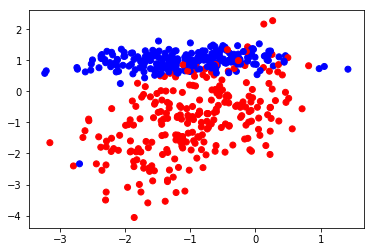

In [408]:
X = np.genfromtxt('DATA/linearX.csv', delimiter=',') 
y = np.genfromtxt('DATA/linearY.csv', delimiter=',').astype(np.int64)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)
plt.show()

This seems that I can use a straight line to seperate two classes, but I will see later.

In [409]:
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
logreg = LogisticRegression(input_dim, output_dim)

I initialize the model and check the cost, accuracy, and decision boundary for a first glance:

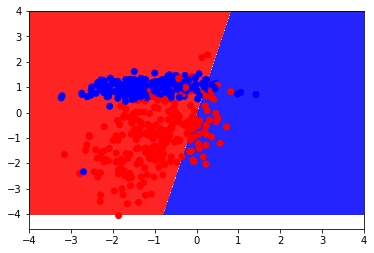

In [410]:
plot_decision_boundary(logreg, X, y)

In [411]:
cost = logreg.compute_cost(X,y)
print (cost)
acc = 0
y_pred = logreg.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

1.54277733502
ACCURACY:  0.44
CONFUSION MATRIX: 
 [[   8.   38.]
 [ 242.  212.]]


The decision_boundary shows a very bad model. The cost per sample is 1.91 which is the almost the double of (1-0) and the accuray is 0.128 out of 1 which is very low

Now I need to train our model.

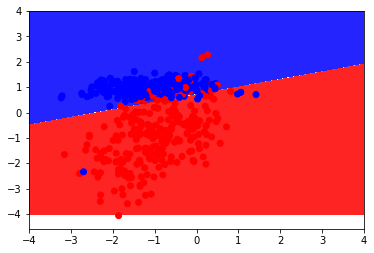

In [412]:
logreg.fit(X,y,1000,lr=0.001)
plot_decision_boundary(logreg, X, y)

In [413]:
acc = 0
y_pred = logreg.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.93
CONFUSION MATRIX: 
 [[ 244.   29.]
 [   6.  221.]]


In [414]:
cost = logreg.compute_cost(X,y)
print (cost)

0.207171887793


Now I can see most of the blue dots and red dots are classified seperately in two groups.
The accuracy rises to 0.93 and the cost decreases to 0.2. I think I build a very good 2-layer neural network without hiddden layer.

## Step 2: Nonlinear data in 2-Layer Neural Network 

Now I'm considering whether this kind of 2-layer neural network without hiddden layer can predict nonliner data as well. So we do the same thing above for the nonliner dataset ( DATA/NonlinearX.csv, DATA/NonlinearY.csv )

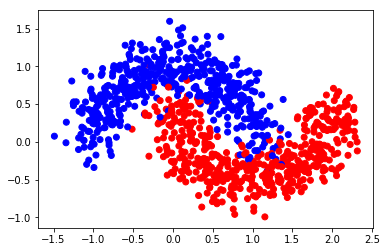

In [415]:
X = np.genfromtxt('DATA/NonlinearX.csv', delimiter=',') 
y = np.genfromtxt('DATA/NonlinearY.csv', delimiter=',').astype(np.int64)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)
plt.show()

In [416]:
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
logreg = LogisticRegression(input_dim, output_dim)

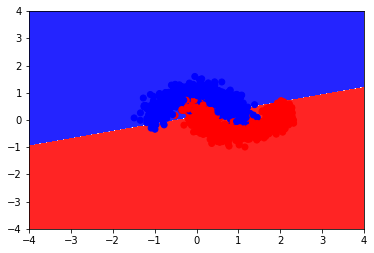

In [417]:
logreg.fit(X,y,1000,lr=0.001)
plot_decision_boundary(logreg, X, y)

In [418]:
acc = 0
y_pred = logreg.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.875
CONFUSION MATRIX: 
 [[ 437.   62.]
 [  63.  438.]]


In [419]:
cost = logreg.compute_cost(X,y)
print (cost)

0.290882470401


From the data plot, I know that this nolinear datasets needs a nonlinear decision boundary to seperate two classes. However, my 2-layer neural network model can't do that perfectly because without any hidden layers it can only compute a straigh line as decision boundary. Therefore, I'm encouraged to build a 3-layer neural network with one hidden layer to get better decision boundary for the dataset.

## Step 3: Neural Network with one Hidden Layer

To build a 3-layer neural network with one hidden layer, I need to create a new class called NeuralNetwork with functions that are slightly different from the functions LogisticRegression class because I need to add nodes in the hidden layer, assign weights to the new edges, and also compute new activation function.

Note: for the 3-layer neural networks I build in this step, I add 20 nodes in the hidden layer by default.

In [420]:
class NeuralNetwork:
    """
    This class implements a Logistic Regression Classifier.
    """
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        """
        Initializes the parameters of the logistic regression classifer to 
        random values.
        
        args:
            input_dim: Number of dimensions of the input data
            output_dim: Number of classes
        """
        
        self.theta1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)
        self.bias1 = np.zeros((1, hidden_dim))
        self.theta2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
        self.bias2 = np.zeros((1, output_dim))
        
    #--------------------------------------------------------------------------
    
    def compute_cost(self,X, y):
        """
        Computes the total cost on the dataset.
        
        args:
            X: Data array
            y: Labels corresponding to input data
        
        returns:
            cost: average cost per data sample
        """
        num_examples = np.shape(X)[0]
        z1 = np.dot(X,self.theta1) + self.bias1
        a1 = np.tanh(z1)
        z2 = np.dot(a1,self.theta2) + self.bias2
        exp_z = np.exp(z2)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        
        one_hot_y = np.zeros((num_examples,np.max(y)+1))
        logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(softmax_scores[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss) 
        return 1./num_examples * data_loss

    
    #--------------------------------------------------------------------------
 
    def predict(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        z1 = np.dot(X,self.theta1) + self.bias1
        a1 = np.tanh(z1)
        z2 = np.dot(a1,self.theta2) + self.bias2
        exp_z = np.exp(z2)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        predictions = np.argmax(softmax_scores, axis = 1)
        return predictions
        
    #--------------------------------------------------------------------------
    
    def fit(self,X,y,num_epochs,lr):
        """
        Learns model parameters to fit the data.
        """  

        for epoch in range(0, num_epochs):

            # Forward propagation
            z1 = np.dot(X,self.theta1) + self.bias1
            a1 = np.tanh(z1)
            z2 = np.dot(a1,self.theta2) + self.bias2
            exp_z = np.exp(z2)
            softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
            
            # Backpropagation
            beta2 = np.zeros_like(softmax_scores)
            one_hot_y = np.zeros_like(softmax_scores)
            for i in range(X.shape[0]):
                one_hot_y[i,y[i]] = 1
            beta2 = softmax_scores - one_hot_y
            beta1 = np.dot(beta2, self.theta2.T) * (1 - np.power(a1, 2))
    
            # Compute gradients of model parameters
            dtheta2 = np.dot(a1.T, beta2)
            dbias2 = np.sum(beta2, axis=0)
            dtheta1 = np.dot(X.T, beta1)
            dbias1 = np.sum(beta1, axis=0)
        
            # Gradient descent parameter update
            self.theta2 -= lr * dtheta2
            self.bias2 -= lr * dbias2
            self.theta1 -= lr * dtheta1
            self.bias1 -= lr * dbias1
            
        return 0

In [421]:
def plot_decision_boundary(model, X, y):
    """
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-4, 4, 0.01), np.arange(-4, 4, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.show()

I first build 3-layer neural network for the linear dataset:

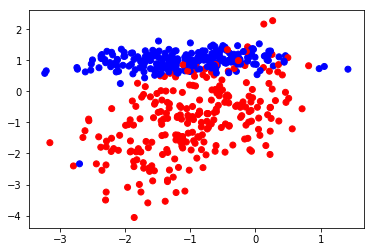

In [422]:
X = np.genfromtxt('DATA/linearX.csv', delimiter=',') 
y = np.genfromtxt('DATA/linearY.csv', delimiter=',').astype(np.int64)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)
plt.show()

In [423]:
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
hidden_dim = 20 #set number of hidden nodes
neunet = NeuralNetwork(input_dim, hidden_dim, output_dim)

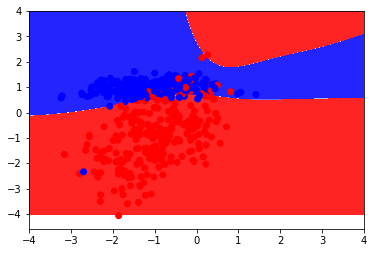

In [424]:
neunet.fit(X,y,1000,lr=0.001)
plot_decision_boundary(neunet, X, y)

In [425]:
acc = 0
y_pred = neunet.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.948
CONFUSION MATRIX: 
 [[ 244.   20.]
 [   6.  230.]]


In [426]:
cost = neunet.compute_cost(X,y)
print (cost)

0.135282074823


By looking at the decision boundary produced by our 3-layer neural network, I find that it's very different with the one generated by the 2-layer neural network. The one produced by my 3-layer neural network has a specific red region to classify the few red dots above the blue dots but my 2-layer neural network doesn't have that. Furthermore, I find that the accuracy rises and the cost decreases. So I think that adding a hidden layer into a neural network can make a better model to do classificaiton. 

Then I decide to train the 3-layer neural network for the nonlinear dataset to see whether I can have the same conclusion we get above.

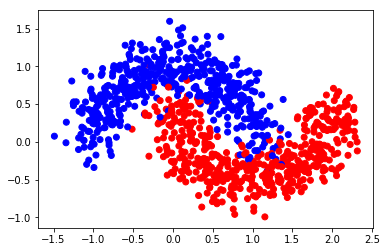

In [427]:
X = np.genfromtxt('DATA/NonlinearX.csv', delimiter=',') 
y = np.genfromtxt('DATA/NonlinearY.csv', delimiter=',').astype(np.int64)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)
plt.show()

In [428]:
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
hidden_dim = 20 #set number of hidden nodes
neunet = NeuralNetwork(input_dim, hidden_dim, output_dim)

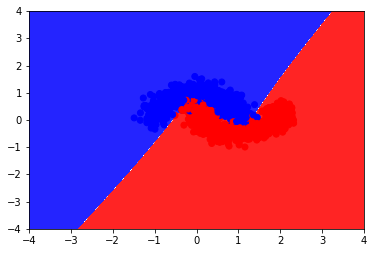

In [429]:
neunet.fit(X,y,1000,lr=0.001)
plot_decision_boundary(neunet, X, y)

In [430]:
acc = 0
y_pred = neunet.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.967
CONFUSION MATRIX: 
 [[ 483.   16.]
 [  17.  484.]]


In [431]:
cost = neunet.compute_cost(X,y)
print (cost)

0.0832015287631


Compared with the decison boundary produced by our 2-layer neural network in Step 2, our 3-layer neural network computes a nonlinear decison boundary that can better seperate the two classe. The accuracy rises to 0.968 and the cost decreases to 0.08. 

Therefore, I conclude that a 3-layer neural network with one hidden layer can learn non-linear decision boundary better than a 2-layer neural network without hidden layer, and the former can produce higher accuracy and lower cost than the latter. 

The main reason is that sometimes a neural network can't derictly understand the inputs well and adding hidden layers can transform original inputs into more useful inputs for different activition funcitons that can produce more accurate output. For example we want to build a picture classifier to determine whether the input picture is a bus, if we have wheel detector (to help tell you it's a vehicle) and a box detector (since the bus is shaped like a big box) and a size detector (to tell you it's too big to be a car) as nodes in a hidden layer, they can help the model better indentify busses.

Reference: https://stats.stackexchange.com/questions/63152/what-does-the-hidden-layer-in-a-neural-network-compute

## Step 4: The Effect ot Learning Rate

Now I'm interested in what effect the learning rate has on the 3-layer neural network I trained. I choose to use the nonlinear dataset and I want to see how the cost and the accuracy change by varying the value of learning rate. I will use for loops to assign different learning rate and compute each cost and accuracy the model computs, and then plot them to see the trend.

Load the nonlinear data set.

In [432]:
X = np.genfromtxt('DATA/NonlinearX.csv', delimiter=',') 
y = np.genfromtxt('DATA/NonlinearY.csv', delimiter=',').astype(np.int64)
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
hidden_dim = 20 #set number of hidden nodes

I choose learning rates as 100 numbers from 0.0001 to 0.01 (like 0.0001, 0.0002, ..., 0.0099, 0.01)

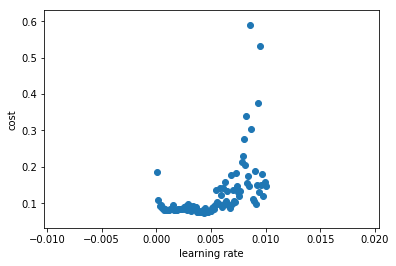

In [435]:
a = np.linspace(0.0001,0.01,100)

# record each learning rate and each cost
x_ele = []
y_ele = []

for i in a:
    neunet = NeuralNetwork(input_dim, hidden_dim, output_dim)
    neunet.fit(X,y,1000,lr=i)
 
    cost = neunet.compute_cost(X,y)
    x_ele.append(i)
    y_ele.append(cost)

plt.scatter(x_ele,y_ele)
plt.xlabel('learning rate')
plt.ylabel('cost')
plt.show()

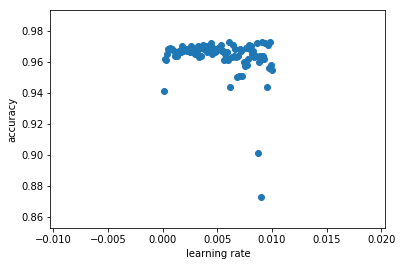

In [436]:
a = np.linspace(0.0001,0.01,100)

# record each learning rate and each accuracy
x_ele = []
y_ele = []

for j in a:
    neunet = NeuralNetwork(input_dim, hidden_dim, output_dim)
    neunet.fit(X,y,1000,lr=j)
    
    acc = 0
    y_pred = neunet.predict(X)
    for i in range(len(y_pred)):
        con_mat[y_pred[i], y[i]] += 1
        if y[i] == y_pred[i]:
            acc += 1
    acc = acc/len(y_pred)
    
    x_ele.append(j)
    y_ele.append(acc)
    
plt.scatter(x_ele,y_ele)
plt.xlabel('learning rate')
plt.ylabel('accuracy')
plt.show()

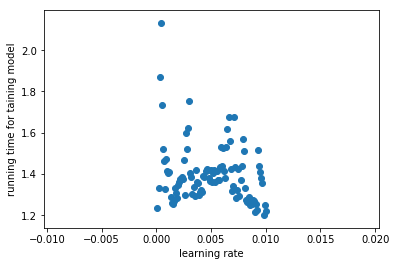

In [438]:
import timeit

a = np.linspace(0.0001,0.01,100)
x_ele = []
y_ele = []

for j in a:
    neunet = NeuralNetwork(input_dim, hidden_dim, output_dim)
    start = timeit.default_timer()
    neunet.fit(X,y,1000,lr= j)
    stop = timeit.default_timer()
    time = (stop - start) 
    x_ele.append(j)
    y_ele.append(time)

plt.scatter(x_ele,y_ele)
plt.xlabel('learning rate')
plt.ylabel('running time for taining model')
plt.show()

From the first two plots above, I find that when the learning rate gets larger, the cost will get larger (seems exponentially) and the accuracy diverges more (higher probability of having a lower accuracy). 

According to the Machine Learning course taught by Andrew Ng on Coursera, the reason why high learn rate results very high cost and low accuracy is that, when we training a model, gradient descent can overshoot the minimum if high learning rate is too high. It may fail to converge to the minimum or even diverge. Therefore, we should keep rate low enough. However, if the learning rate is too low, the running time for gradient descent to find minimum will be too long (this is also why in the third plot, the running time could be very high as learning rate becomes very close to zero). So we should keep learning rate neither too high nor too low. 

## Step 5: The Effect of Number of Nodes in a Hidden Layer

To move on, now I want to analyze how the number of nodes in a hidden effect the 3-layer neural network I trained.

I still use the nonlinear dataset and use for loops to compute neural networks with different numbers of node, then see how the decision boundary, accuracy, cost, and running time change. 

In [388]:
X = np.genfromtxt('DATA/NonlinearX.csv', delimiter=',') 
y = np.genfromtxt('DATA/NonlinearY.csv', delimiter=',').astype(np.int64)
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1

In [379]:
a = np.linspace(1,4,4)
a

array([ 1.,  2.,  3.,  4.])

In [391]:
b = np.linspace(1,20,20)
b

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.])

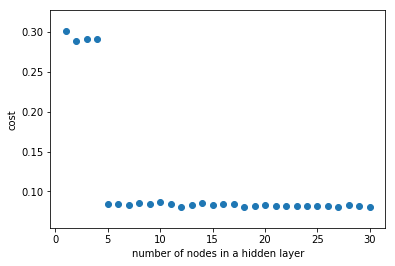

In [399]:
x_ele = []
y_ele = []

for j in range(1,31):
    hidden_dim = j
    neunet = NeuralNetwork(input_dim, hidden_dim, output_dim)
    neunet.fit(X,y,1000,lr=0.001)
    cost = neunet.compute_cost(X,y)
    x_ele.append(j)
    y_ele.append(cost)

plt.scatter(x_ele,y_ele)
plt.xlabel('number of nodes in a hidden layer')
plt.ylabel('cost')
plt.show()

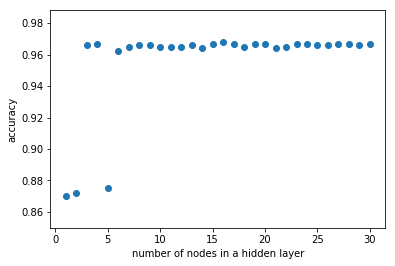

In [400]:
x_ele = []
y_ele = []

for j in range(1,31):
    hidden_dim = j
    neunet = NeuralNetwork(input_dim, hidden_dim, output_dim)
    neunet.fit(X,y,1000,lr=0.001)
    
    acc = 0
    y_pred = neunet.predict(X)
    for i in range(len(y_pred)):
        con_mat[y_pred[i], y[i]] += 1
        if y[i] == y_pred[i]:
            acc += 1
    acc = acc/len(y_pred)
    
    x_ele.append(j)
    y_ele.append(acc)

plt.scatter(x_ele,y_ele)
plt.xlabel('number of nodes in a hidden layer')
plt.ylabel('accuracy')
plt.show()

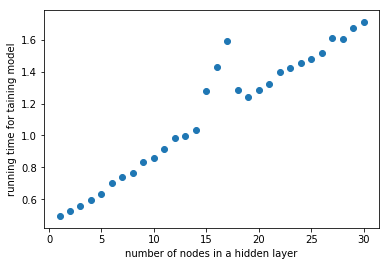

In [402]:
import timeit

x_ele = []
y_ele = []

for j in range(1,31):
    hidden_dim = j
    neunet = NeuralNetwork(input_dim, hidden_dim, output_dim)
    start = timeit.default_timer()
    neunet.fit(X,y,1000,lr=0.001)
    stop = timeit.default_timer()
    time = (stop - start) 
    x_ele.append(j)
    y_ele.append(time)

plt.scatter(x_ele,y_ele)
plt.xlabel('number of nodes in a hidden layer')
plt.ylabel('running time for taining model')
plt.show()

From the first two plots above, I notice that when the number of nodes is less (or equal to) than five the model has relatively higher cost and lower accuracy. However, once the number of nodes is above 5, the cost decreases to a level and sticks around there as number of nodes increases. Similarly, once the number of nodes is above 5, the accuracy increases to a level and sticks around there as number of nodes increases. Therefore, I think I don't need to initialize the number of nodes in hidden layers as 20, maybe 5 or 6 is good enough. Along with the third plot which shows the more nodes I add, the longer it takes to train the model. I become more confident that I don't need to have 20 nodes in the hidden layer. That is too many.

## Step 6: Overfitting

The effect of the number of nodes on a neural networks reminds me the problem of overfitting when we do modeling. Overfitting means that we use so many features as inputs that we build a model that fits too closely to the training dataset but it doesn't fit well to the testing dataset, or any other samples. 

According to the lecutre sildes, there are three ways to reduce overfitting:
    1. Use “wrapper” to enumerate models h according to model size (e.g., number of nodes in neural net h). Select model with smallest error.
    2. Feature selection: Simplify model by discarding irrelevant attributes (dimensionality reduction).
    3. Minimum description length: Select model with smallest number of bits required to encode program and data.
 
According to the Machine Learning course taught by Andrew Ng on Coursera, we can reduce overfitting by:
    1. Reducing the number of features:
        -manually select whihc features to keep 
        -use model selection algorithm
    2. Regularization:
        -keep all features but reduce magnitude/values of each parameters thetas; this works well when we have a lot of features and regularization makes each of them contribute a bit to pedict y. 
        
        



## Step 7: L2 Regularization

Now I want to use L2 regulazrization based on my step 3 to see whether it can improve my 3-layer neural network. 

To compute L2 regularization, I need to add norm 2 penalizing term in my cost function and also make some change in my fit function under the NeuralNetwork class. So I have the NeuralNetwork_L2 class as the following.

In [351]:
class NeuralNetwork_L2:
    """
    This class implements a Logistic Regression Classifier.
    """
    
    def __init__(self, input_dim, hidden_dim, output_dim, Lambda):
        """
        Initializes the parameters of the logistic regression classifer to 
        random values.
        
        args:
            input_dim: Number of dimensions of the input data
            output_dim: Number of classes
        """
        
        self.theta1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)
        self.bias1 = np.zeros((1, hidden_dim))
        self.theta2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
        self.bias2 = np.zeros((1, output_dim))
        self.Lambda = Lambda
        
    #--------------------------------------------------------------------------
    
    def compute_cost(self,X, y):
        """
        Computes the total cost on the dataset.
        
        args:
            X: Data array
            y: Labels corresponding to input data
        
        returns:
            cost: average cost per data sample
        """
        num_examples = np.shape(X)[0]
        z1 = np.dot(X,self.theta1) + self.bias1
        a1 = np.tanh(z1)
        z2 = np.dot(a1,self.theta2) + self.bias2
        exp_z = np.exp(z2)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        
        one_hot_y = np.zeros((num_examples,np.max(y)+1))
        logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(softmax_scores[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss)/np.shape(X)[0] + (self.Lambda/2) * (np.sum(self.theta2**2) + np.sum(self.theta1**2))
        return 1./num_examples * data_loss

    
    #--------------------------------------------------------------------------
 
    def predict(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        z1 = np.dot(X,self.theta1) + self.bias1
        a1 = np.tanh(z1)
        z2 = np.dot(a1,self.theta2) + self.bias2
        exp_z = np.exp(z2)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        predictions = np.argmax(softmax_scores, axis = 1)
        return predictions
        
    #--------------------------------------------------------------------------
    
    def fit(self,X,y,num_epochs,lr):
        """
        Learns model parameters to fit the data.
        """  

        for epoch in range(0, num_epochs):

            # Forward propagation
            z1 = np.dot(X,self.theta1) + self.bias1
            a1 = np.tanh(z1)
            z2 = np.dot(a1,self.theta2) + self.bias2
            exp_z = np.exp(z2)
            softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
            
            # Backpropagation
            beta2 = np.zeros_like(softmax_scores)
            one_hot_y = np.zeros_like(softmax_scores)
            for i in range(X.shape[0]):
                one_hot_y[i,y[i]] = 1
            beta2 = softmax_scores - one_hot_y
            beta1 = np.dot(beta2, self.theta2.T) * (1 - np.power(a1, 2))
    
            # Compute gradients of model parameters
            dtheta2 = np.dot(a1.T, beta2)/np.shape(X)[0] + self.Lambda * self.theta2
            dbias2 = np.sum(beta2, axis=0)
            dtheta1 = np.dot(X.T, beta1)/np.shape(X)[0] + self.Lambda * self.theta1
            dbias1 = np.sum(beta1, axis=0)
            
            #dtheta1 += self.Lambda * self.theta1
            #dtheta2 += self.Lambda * self.theta2
            
        
            # Gradient descent parameter update
            self.theta2 -= lr * dtheta2
            self.bias2 -= lr * dbias2
            self.theta1 -= lr * dtheta1
            self.bias1 -= lr * dbias1
            
        return 0

To better see how 2L regularization reduce overfitting, I split the nonliner dataset into trainning set and testing set.

In [3]:
X = np.genfromtxt('DATA/NonlinearX.csv', delimiter=',') 
y = np.genfromtxt('DATA/NonlinearY.csv', delimiter=',').astype(np.int64)

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

input_dim = np.shape(Xtrain)[1]
output_dim = np.max(ytrain) + 1
hidden_dim = 20 

To illustrate how 2L works and reduces overfitting, I will use the unchanged NeuralNetwork class the compute the model's accuracy and cost on testing set. Then I will use the modified NeuralNetwork_L2 class the get the accuracy and cost, and compare them.

Train the model under unchanged NeuralNetwork class.

In [353]:
neunet = NeuralNetwork(input_dim, hidden_dim, output_dim)
neunet.fit(Xtrain,ytrain,1000,lr=0.001)

0

Compute the accuracy.

In [354]:
acc = 0
y_pred = neunet.predict(Xtest)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], ytest[i]] += 1
    if ytest[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.452
CONFUSION MATRIX: 
 [[ 120.    3.]
 [   7.  120.]]


Compute the cost.

In [355]:
cost = neunet.compute_cost(Xtest,ytest)
print (cost)

0.0923680263168


Train the model under modified NeuralNetwork_L2 class.

In [365]:
neunet2 = NeuralNetwork_L2(input_dim, hidden_dim, output_dim, Lambda = 100)
neunet2.fit(Xtrain,ytrain,1000,lr=0.001)

0

Compute the accuracy.

In [366]:
acc = 0
y_pred = neunet2.predict(Xtest)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], ytest[i]] += 1
    if ytest[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.48
CONFUSION MATRIX: 
 [[   0.    0.]
 [ 127.  123.]]


Compute the cost.

In [367]:
cost = neunet2.compute_cost(Xtest,ytest)
print (cost)

0.00277298694851


Now we can see that by using L2 regularization, in terms of evaluating how my 3-layer nerual network fitting the testing dataset, the accuracy rising from 0.45 to 0.48, and the cost decreases from 0.92 to 0.00277. Therefore, 2L regularization indeed can reduce overfitting. Furthermore, we can change the value of Lambda to modify the penalizing level for each input features.

## Step 8:  Hand-written Digits Recognition

In this last step of my project, I chanllenge myself to use the 3-layer neural network I build in previous steps to realize hand-written digits recognition. By having the pixels of the picture of each hand-written digit as inputs, I want my model to compute which number (0, 1, 2,..., 9) each input picture represents.

Initialize the NeuralNetwork Class again.

In [227]:
class NeuralNetwork:
    """
    This class implements a Logistic Regression Classifier.
    """
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        """
        Initializes the parameters of the logistic regression classifer to 
        random values.
        
        args:
            input_dim: Number of dimensions of the input data
            output_dim: Number of classes
        """
        
        self.theta1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)
        self.bias1 = np.zeros((1, hidden_dim))
        self.theta2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
        self.bias2 = np.zeros((1, output_dim))
        
    #--------------------------------------------------------------------------
    
    def compute_cost(self,X, y):
        """
        Computes the total cost on the dataset.
        
        args:
            X: Data array
            y: Labels corresponding to input data
        
        returns:
            cost: average cost per data sample
        """
        num_examples = np.shape(X)[0]
        z1 = np.dot(X,self.theta1) + self.bias1
        a1 = np.tanh(z1)
        z2 = np.dot(a1,self.theta2) + self.bias2
        exp_z = np.exp(z2)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        
        one_hot_y = np.zeros((num_examples,np.max(y)+1))
        logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(softmax_scores[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss) 
        return 1./num_examples * data_loss

    
    #--------------------------------------------------------------------------
 
    def predict(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        z1 = np.dot(X,self.theta1) + self.bias1
        a1 = np.tanh(z1)
        z2 = np.dot(a1,self.theta2) + self.bias2
        exp_z = np.exp(z2)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        predictions = np.argmax(softmax_scores, axis = 1)
        return predictions
        
    #--------------------------------------------------------------------------
    
    def fit(self,X,y,num_epochs,lr):
        """
        Learns model parameters to fit the data.
        """  

        for epoch in range(0, num_epochs):

            # Forward propagation
            z1 = np.dot(X,self.theta1) + self.bias1
            a1 = np.tanh(z1)
            z2 = np.dot(a1,self.theta2) + self.bias2
            exp_z = np.exp(z2)
            softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
            
            # Backpropagation
            beta2 = np.zeros_like(softmax_scores)
            one_hot_y = np.zeros_like(softmax_scores)
            for i in range(X.shape[0]):
                one_hot_y[i,y[i]] = 1
            beta2 = softmax_scores - one_hot_y
            beta1 = np.dot(beta2, self.theta2.T) * (1 - np.power(a1, 2))
    
            # Compute gradients of model parameters
            dtheta2 = np.dot(a1.T, beta2)
            dbias2 = np.sum(beta2, axis=0)
            dtheta1 = np.dot(X.T, beta1)
            dbias1 = np.sum(beta1, axis=0)
        
            # Gradient descent parameter update
            self.theta2 -= lr * dtheta2
            self.bias2 -= lr * dbias2
            self.theta1 -= lr * dtheta1
            self.bias1 -= lr * dbias1
            
        return 0

In [228]:
def plot_decision_boundary(model, X, y):
    """
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-4, 4, 0.01), np.arange(-4, 4, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.show()

Load data.

In [155]:
#training set 
X_train = np.genfromtxt('DATA/Digit_X_train.csv', delimiter=',')
y_train = np.genfromtxt('DATA/Digit_y_train.csv', delimiter=',')
y_train = y_train.astype(int)

#testing set
X_test = np.genfromtxt('DATA/Digit_X_test.csv', delimiter=',')
y_test = np.genfromtxt('DATA/Digit_y_test.csv', delimiter=',')
y_test = y_test.astype(int)

Initialize the model.

In [157]:
input_dim = np.shape(X_train)[1]
output_dim = np.max(y_train) + 1
hidden_dim = 20 #set number of hidden nodes
neunet = NeuralNetwork(input_dim, hidden_dim, output_dim)

Train the model.

In [191]:
neunet.fit(X_train,y_train,lr=0.001)
y_pred = neunet.predict(X_test)

Compute accuracy and confusion matrix.

In [159]:
acc = 0
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y_test[i]] += 1
    if y_test[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)

print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.9454949944382648
CONFUSION MATRIX: 
 [[ 86.   0.   0.   0.   2.   0.   0.   0.   0.   0.]
 [  0.  82.   0.   0.   1.   0.   1.   1.   3.   0.]
 [  0.   0.  84.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   1.   2.  81.   0.   0.   0.   0.   1.   1.]
 [  1.   0.   0.   0.  86.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   3.   0.  87.   0.   0.   3.   2.]
 [  1.   0.   0.   0.   0.   1.  90.   0.   1.   0.]
 [  0.   0.   0.   1.   0.   0.   0.  85.   0.   0.]
 [  0.   2.   0.   6.   0.   0.   0.   0.  80.   0.]
 [  0.   6.   0.   0.   3.   3.   0.   3.   0.  89.]]


As the above shows, my model has the accuracy of about 0.95 which is very close to 1, and in the confusion matrix, most of the numbers are lying on the diagonal. Therefore, I can conclude that my 3-layer neural network can work very well for hand-written digit recognition.

Furthermore, by the following code, I can show the images of first five inputs in testing set and their predicted output and actual output.

In [177]:
from PIL import Image

#my first five inputs in testing set
for i in range(3,5):
    data = np.reshape(255*X_test[i],(8,8)) #i--the ith digit
    image = Image.fromarray(data)
    image.show()

In [165]:
#my first five predicted values
y_pred[0:5]

array([8, 6, 4, 9, 0])

In [167]:
#my first five actual output
y_test[0:5]

array([8, 8, 4, 9, 0])

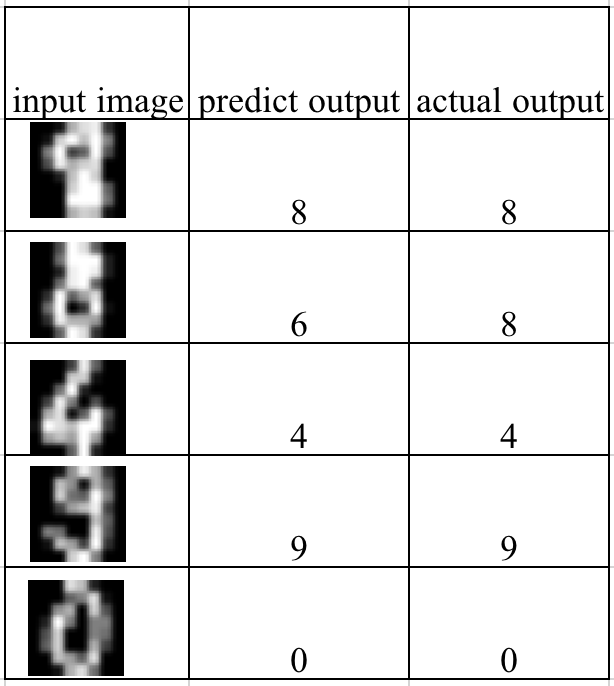

In [190]:
from IPython.core.display import Image
Image("/Users/MZR/Desktop/CS 440/Program 1/DATA/Tablehw1.png", width = 200, height = 400)

# Discussion

Discuss your method and results:

### Q: What are the strengths and weaknesses of your method?

I think my strength is having good understanding of the fundamental of neural networks both from class and by online self-study and transforming abstract knowledge into well-structured codes in Python. By using the functions I build, I can easily initialize and train any kind of neural networks I want. Furthermore, I know how to use decision boundary, accuracy, cost, and running time to evaluate the performance of a neural network model. Therefore, by familiarizing how neural network model works, how to train a model through gradient descent with forward and backward propagation, and how to reduce overfitting by regularization fundamentally, I have the advantage to implement them technically through programming. 

My weakness is in step 4 and step 5 where I use for loops to see how accuracy and cost change at 100 different values of learning rate and 30 different amount of nodes in hidden layer. The plots I get are good enough for me to make conclusion but there my for loops take long time to compute plots and every time there are few going points or outliers that don’t follow the cluster trends. Maybe there are better algorithm for step 4 and step 5 (problem 4 and 5).

### Q: Do your results show that your method is generally successful or are there limitations? 

The result of neural network for handwritten digits recognition is quite successful. It ends with a high accuracy about 94.5%. Maybe recognizing single digit number is not a difficult job, so I would like to conduct more complicated image recognition through neural network. 

On the other hand, although the L2 regularization reduces overfitting in the step 6 of my experiment, the model with L2 regularization doesn’t improve so much compared with the model without L2 regularization. This may because overfitting is indeed a hard problem solve or I should improve my functions involved with L2 regularization or increase the value of Lambda. 



### Q: Describe what you expected to find in your experiments, and how that differed or was confirmed by your results.

I expect that neural network with hidden layer can better predict linear and especially nonlinear data than a neural network without hidden layer, and L2 regularization can reduce overfitting. My experiment confirms my those two expectation. 

I also expect that the lower the learning rate is and also the more nodes a hidden layer has, the better the performance a neural network should have. However, my experiment results show that for both learning rate and node number, we should keep them neither too high nor too low. 

### Q: Potential future work. How could your method be improved? What would you try (if you had more time) to overcome the failures/limitations of your work?

As I mention above, in step 4 and step 5 (problem 4 and 5), I create for loops to see how accuracy, cost, running time differ as learning rate and nodes number change. However, I ignore that every time when I initialize a new neural network, all weights are random initialized and so are different every time. That means, even I fix the learning rate and node numbers, my result of accuracy, cost, running time will be different. Therefore, to realize scientific control as perfect as possible, I should get the accuracy, cost, running time as each earning rate and nodes number for n times (integer n should be as larger as possible), and calculate each average then plot those average numbers. In this way, I should get better plots to analyze. However, that method may take much longer running time. 

# Conclusion

### Q: Based on your discussion, what are your conclusions? What is your main message?

In all, through my project, I can conclude that: 

A neural network with hidden layer can much better predict nonlinear data than a neural network without hidden layer.
When we train a model, we should use a learning rate that is neither too high (causes divergence or failure of finding minimum cost) nor too low (causes long running time).
In a hidden layer, if the number of nodes is too few, the neural network may have low accuracy and high cost. And when we add nodes to s specific amount in a hidden layer, there is no need to add more because the performance of the network has reached a maximum level.
2L regularization indeed can reduce overfitting in a neural network. 
The 3-layer neural network I build can realize handwritten digits recognition very well with an accuracy about 94.5% through model testing. 

In all, neural network is a strong machine learning technique for me to solve many data science problems and I will definitely go deeper into it in my future academic study. 


# Reference 

Accessed the following web for explanation of hidden layers in neural networks on 02/25/2018: https://stats.stackexchange.com/questions/63152/what-does-the-hidden-layer-in-a-neural-network-compute

Accessed the following online machine learning course from January to February in 2018:
https://www.coursera.org/learn/machine-learning
